## Can the CEO market this product across India that BlueBull is a height enhancer 

## Importing necessary library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Importing csv and converting it to Data frame

In [2]:
blue_bells_control_data=pd.read_excel('Case Study Data .xlsx',sheet_name='Control')
blue_bells_test_data=pd.read_excel('Case Study Data .xlsx',sheet_name='Test')
variance_threshold = 4
alpha = 0.05

### Finding increase in height for control and test population over 12 month

In [3]:
def calculate_height_increase(row):
    return row['Month 12']-row['Base Height']
    

blue_bells_control_data['Height Increase']=blue_bells_control_data.apply(calculate_height_increase,axis=1)
blue_bells_test_data['Height Increase']=blue_bells_test_data.apply(calculate_height_increase,axis=1)

## Finding the distribution of data 

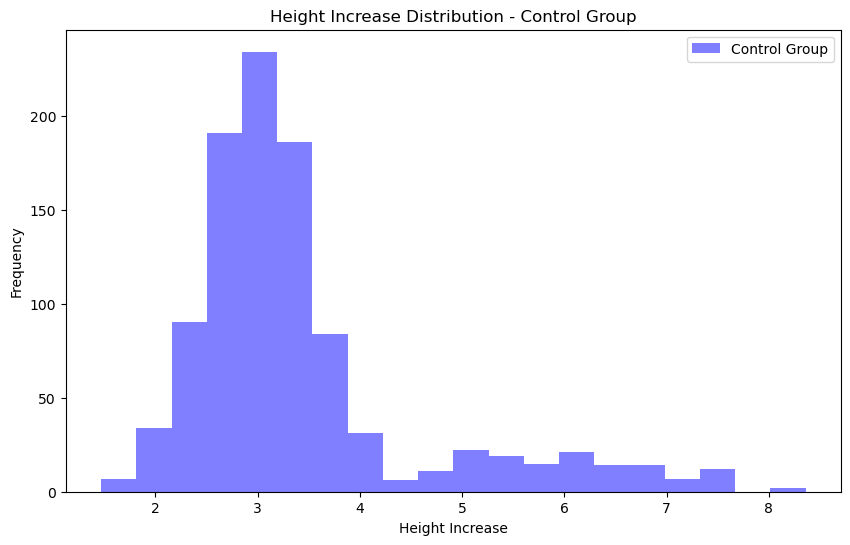

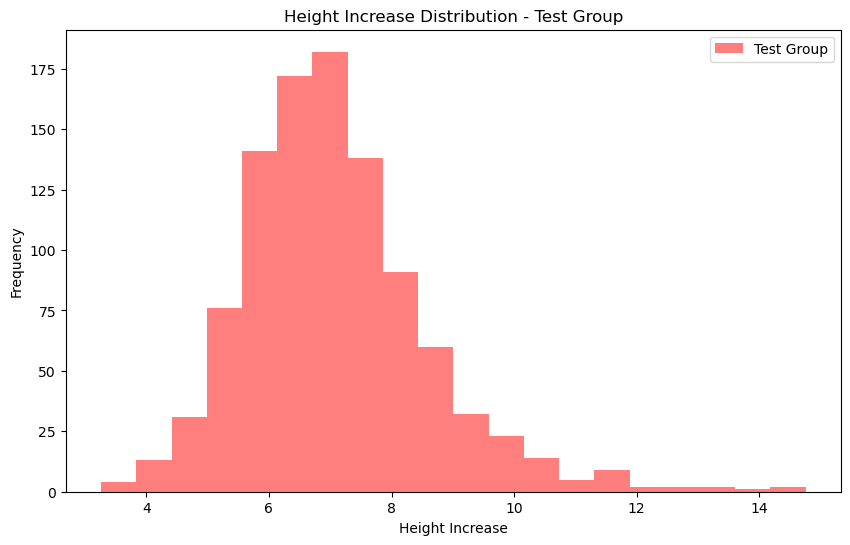

In [4]:
# Plot for Control Group
plt.figure(figsize=(10, 6))
plt.hist(blue_bells_control_data['Height Increase'], bins=20, alpha=0.5, color='blue', label='Control Group')
plt.xlabel('Height Increase')
plt.ylabel('Frequency')
plt.title('Height Increase Distribution - Control Group')
plt.legend()

# Plot for Test Group
plt.figure(figsize=(10, 6))
plt.hist(blue_bells_test_data['Height Increase'], bins=20, alpha=0.5, color='red', label='Test Group')
plt.xlabel('Height Increase')
plt.ylabel('Frequency')
plt.title('Height Increase Distribution - Test Group')
plt.legend()

plt.show()

## Finding the p value 

In [5]:
'''
p-value < alpha : reject H_o
p-value >= alpha : Fail to reject H_o
'''


control_data = blue_bells_control_data['Height Increase']
test_data = blue_bells_test_data['Height Increase']

# Calculate variances
var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
var_test = np.var(test_data, ddof=1)

# Calculate the ratio of variances
variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control

# Set your threshold for considering equal variances (e.g., 4:1)
variance_threshold = 4

alpha = 0.05

# Perform the t-test based on variance comparison

if variance_ratio < variance_threshold:
    t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=True,alternative='greater')
else:
    t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=False,alternative='greater')

# Determine whether to reject or accept the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is enough evidence to conclude that the blue bells drink helps as height enhancer.")
    hypothesis_result = "Reject Null Hypothesis"
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the blue bells drink helps as height enhancer.")

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)





Reject the null hypothesis.
There is enough evidence to conclude that the blue bells drink helps as height enhancer.
t-statistic: 60.63426916353843
p-value: 0.0


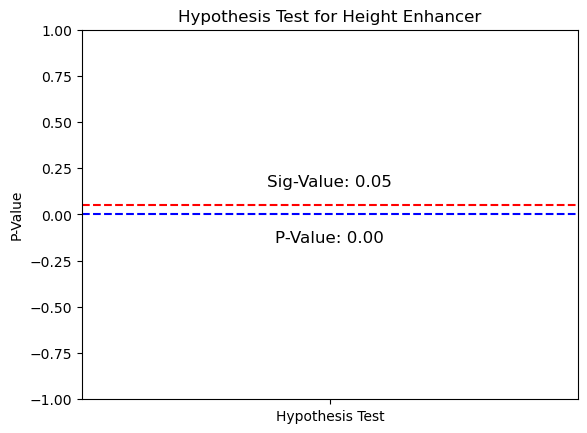

Hypothesis Result: Reject Null Hypothesis
p-value: 0.0


In [6]:
# Create a bar plot to visualize the result
plt.bar(['Hypothesis Test'], [p_value], color=['blue'])
plt.axhline(y=alpha, color='red', linestyle='--', label='Significance Level (alpha)')
plt.axhline(y=p_value, color='blue', linestyle='--', label='P-Value')
plt.ylim([-1, 1])
plt.ylabel('P-Value')
plt.title('Hypothesis Test for Height Enhancer')

# Annotate the bar with the p-value
plt.text(0, p_value - 0.15, f'P-Value: {p_value:.2f}', ha='center', fontsize=12)
plt.text(0, p_value + 0.15, f'Sig-Value: {alpha:.2f}', ha='center', fontsize=12)

plt.show()

# Print the conclusion and evidence
print("Hypothesis Result:", hypothesis_result)
print("p-value:", p_value)

#### so from above graph we can see that p-value is below the sig value so it is indeed helps in increasing the height 

## In which states of India can the marketing be done by BlueBull based on the experiment?

## Finding the p value 

In [9]:
# Group data by 'State'
grouped_control = blue_bells_control_data.groupby('State')
grouped_test = blue_bells_test_data.groupby('State')

# Lists to store the state names and the test results
states = []
results = []

for state, group_control, group_test in zip(grouped_control.groups.keys(), grouped_control, grouped_test):
    # Get the 'Height Increase' data for the current state
    control_data = group_control[1]['Height Increase']
    test_data = group_test[1]['Height Increase']

    # Calculate variances
    var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
    var_test = np.var(test_data, ddof=1)

    # Calculate the ratio of variances
    variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control

    # Perform the t-test based on variance comparison
    if variance_ratio < variance_threshold:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=True,alternative='greater')
    else:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=False,alternative='greater')

    states.append(state)

    # Determine whether to reject or accept the null hypothesis
    if p_value < alpha:
        print(f"Reject the null hypothesis for state '{state}'.")
        print(f"There is enough evidence to conclude that the blue bells drink helps as a height enhancer in state '{state}'.")
        results.append('Reject')
    else:
        print(f"Fail to reject the null hypothesis for state '{state}'.")
        print(f"There is not enough evidence to conclude that the blue bells drink helps as a height enhancer in state '{state}'.")
        results.append('Fail to Reject')
        
    # Print the t-statistic and p-value
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Reject the null hypothesis for state 'Andhra Pradesh'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer in state 'Andhra Pradesh'.
t-statistic: 16.507920153932112
p-value: 8.908641043013259e-35

Reject the null hypothesis for state 'Arunachal Pradesh'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer in state 'Arunachal Pradesh'.
t-statistic: 11.591958459829591
p-value: 0.003679943422095546

Reject the null hypothesis for state 'Assam'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer in state 'Assam'.
t-statistic: 13.615761819572278
p-value: 9.516494540257339e-19

Reject the null hypothesis for state 'Bihar'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer in state 'Bihar'.
t-statistic: 17.717316217822283
p-value: 9.148512025410075e-41

Fail to reject the null hypothesis for state 'Chandigarh'.
There is not enough evidence

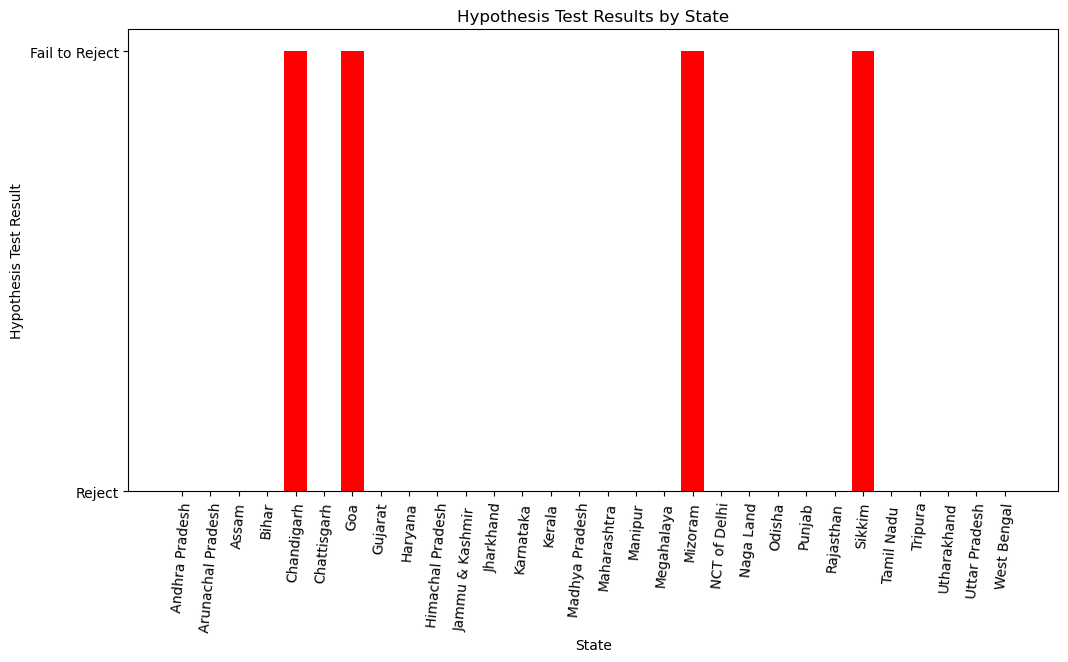

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(states, results, color=['green' if r == "Reject" else 'red' for r in results])
plt.xlabel('State')
plt.ylabel('Hypothesis Test Result')
plt.title('Hypothesis Test Results by State')
plt.xticks(rotation=85)
plt.show()

#### so from above graph we see 4 state are failed to reject the hypothesis apart from these 4 state we are good to market on other states 

### 12 months is really a long time to conclude an experiment and is there a faster way to conclude the experiment for this marketing problem?

In [11]:
def calculate_height_increase(row,monthNo):
    return row['Month {}'.format(monthNo)]-row['Base Height']

In [12]:

months=[]
month_p_values=[]
reject_null_hypothesis=[]

for month in range(1,13):
    
    
    blue_bells_control_data['Height Increase']=blue_bells_control_data.apply(lambda row: calculate_height_increase(row, month),axis=1)
    blue_bells_test_data['Height Increase']=blue_bells_test_data.apply(lambda row: calculate_height_increase(row, month),axis=1)

    # Calculate variances
    var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
    var_test = np.var(test_data, ddof=1)

    # Calculate the ratio of variances
    variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control


    # Perform the t-test based on variance comparison

    if variance_ratio < variance_threshold:
        t_statistic, p_value = stats.ttest_ind(blue_bells_test_data['Height Increase'], blue_bells_control_data['Height Increase'], equal_var=True,alternative='greater')
    else:
        t_statistic, p_value = stats.ttest_ind(blue_bells_test_data['Height Increase'], blue_bells_control_data['Height Increase'], equal_var=False,alternative='greater')
   
    # Store results for this month
    months.append(month)
    month_p_values.append(p_value)
    reject_null_hypothesis.append(p_value < alpha)
    
    # Determine whether to reject or accept the null hypothesis
    if p_value < alpha:
    
        print("the p_value is less than alpha for month {}".format(month))
    else:
        
        print("the p_value is greater than alpha for month {}".format(month))

# Print the t-statistic and p-value
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()


the p_value is less than alpha for month 1
t-statistic: 25.37129029415281
p-value: 1.2284917192441657e-123

the p_value is less than alpha for month 2
t-statistic: 33.88104291854358
p-value: 1.6344092616167784e-199

the p_value is less than alpha for month 3
t-statistic: 39.4571052111791
p-value: 1.4203341293489485e-252

the p_value is less than alpha for month 4
t-statistic: 43.86246198802681
p-value: 3.1270533650420453e-295

the p_value is less than alpha for month 5
t-statistic: 46.28076433673985
p-value: 1.034e-318

the p_value is less than alpha for month 6
t-statistic: 48.566691332676115
p-value: 0.0

the p_value is less than alpha for month 7
t-statistic: 52.06068184768054
p-value: 0.0

the p_value is less than alpha for month 8
t-statistic: 54.04709473219443
p-value: 0.0

the p_value is less than alpha for month 9
t-statistic: 56.213427051612676
p-value: 0.0

the p_value is less than alpha for month 10
t-statistic: 57.383380955898005
p-value: 0.0

the p_value is less than alpha

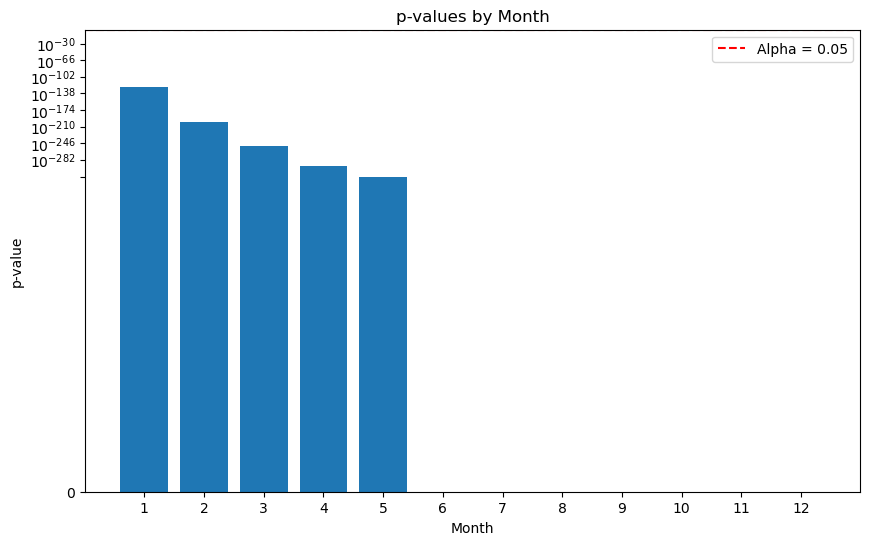

In [13]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(months, month_p_values)
plt.xlabel('Month')
plt.ylabel('p-value')
plt.title('p-values by Month')
plt.xticks(months)
plt.axhline(y=alpha, color='r', linestyle='--', label=f'Alpha = {alpha}')
plt.legend()
# Set the y-axis limit starting from a higher value than the minimum p-value
plt.ylim(-1,1)
plt.yscale('log')
plt.show()

#### So from above Graph we asee from 6 th month it started to see decline in p value so 6 month duration is enough to conduct the experiment 

## Can the CEO market this product across gender and age groups?

#### Grouping Age wise 

In [14]:
# Define the custom age groups

age_bins = [-1, 6, 12, 19]  # Define your age group boundaries here
age_labels = ['0-6', '7-12', '13-19']  # Define labels for each age group


# Apply the custom age groups to your data
blue_bells_control_data['Age Group'] = pd.cut(blue_bells_control_data['Age(In Years)'], bins=age_bins, labels=age_labels)
blue_bells_test_data['Age Group'] = pd.cut(blue_bells_test_data['Age(In Years) '], bins=age_bins, labels=age_labels)

### Finding P value 

In [15]:
# grouping by Age Group 

grouped_control = blue_bells_control_data.groupby('Age Group')
grouped_test = blue_bells_test_data.groupby('Age Group')
age_group=[]
age_p_values=[]

for age, group_control, group_test in zip(grouped_control.groups.keys(), grouped_control, grouped_test):
    # Get the 'Height Increase' data for the current state
    control_data = group_control[1]['Height Increase']
    test_data = group_test[1]['Height Increase']

    # Calculate variances
    var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
    var_test = np.var(test_data, ddof=1)

    # Calculate the ratio of variances
    variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control

    # Perform the t-test based on variance comparison
    if variance_ratio < variance_threshold:
         t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=True,alternative="greater")
    else:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=False,alternative="greater")
    age_group.append(age)
    age_p_values.append(p_value)
    # Determine whether to reject or accept the null hypothesis
    if p_value < alpha:
        print(f"Reject the null hypothesis for age group '{age}'.")
        print(f"There is enough evidence to conclude that the blue bells drink helps as a height enhancer for age group '{age}'.")
    else:
        print(f"Fail to reject the null hypothesis for state '{age}'.")
        print(f"There is not enough evidence to conclude that the blue bells drink helps as a height enhancer for age group '{age}'.")

    # Print the t-statistic and p-value
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Reject the null hypothesis for age group '0-6'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for age group '0-6'.
t-statistic: 32.0162986858595
p-value: 2.9108221437977464e-139

Reject the null hypothesis for age group '7-12'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for age group '7-12'.
t-statistic: 41.210606047166344
p-value: 8.007963051530967e-144

Reject the null hypothesis for age group '13-19'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for age group '13-19'.
t-statistic: 34.9698523346548
p-value: 2.1502506028458642e-154



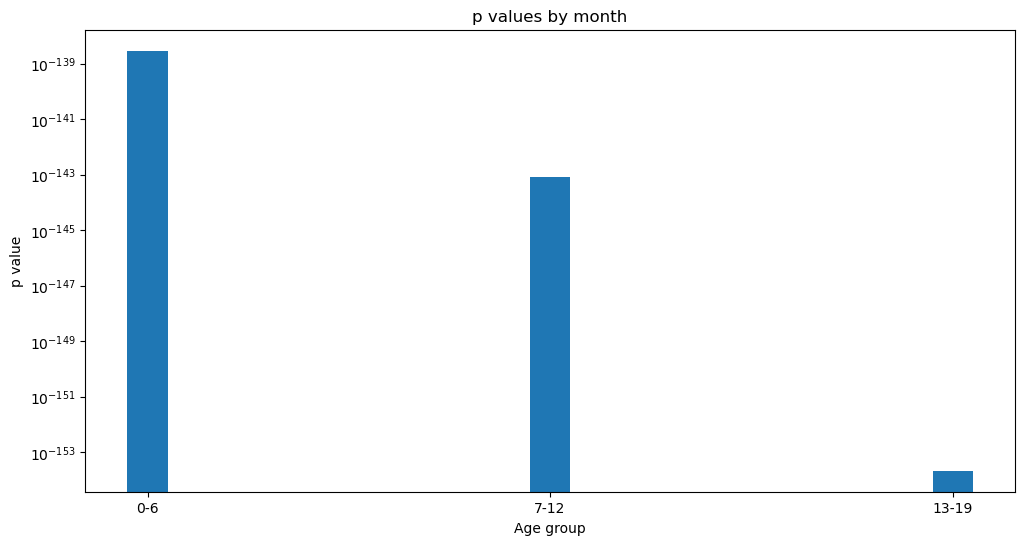

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(age_group, age_p_values,width=0.1)
plt.xlabel('Age group')
plt.ylabel('p value')
plt.title('p values by month')
plt.xticks(rotation=360)
plt.yscale('log')
plt.show()

### From the above graph it is evident that it is within the p value so drink works for all age group but works well for 13-19 age group

In [17]:
# grouping by Gender

grouped_control = blue_bells_control_data.groupby(['Is Male?'])
grouped_test = blue_bells_test_data.groupby(['Is Male?'])
gender_group=[]
gender_p_values=[]

for gender, group_control, group_test in zip(grouped_control.groups.keys(), grouped_control, grouped_test):
    # Get the 'Height Increase' data for the current state
    control_data = group_control[1]['Height Increase']
    test_data = group_test[1]['Height Increase']

    # Calculate variances
    var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
    var_test = np.var(test_data, ddof=1)

    # Calculate the ratio of variances
    variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control

    
    # Perform the t-test based on variance comparison
    if variance_ratio < variance_threshold:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=True,alternative="greater")
    else:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=False,alternative="greater")
        
            
    if gender==0:
        gender='Female'
    else:
        gender='Male'
        
        
    gender_group.append(gender)
    gender_p_values.append(p_value)   
        
    # Determine whether to reject or accept the null hypothesis
    if p_value < alpha:
        print(f"Reject the null hypothesis for gender '{gender}'.")
        print(f"There is enough evidence to conclude that the blue bells drink helps as a height enhancer for gender '{gender}'.")
    else:
        print(f"Fail to reject the null hypothesis for gender '{gender}'.")
        print(f"There is not enough evidence to conclude that the blue bells drink helps as a height enhancer for gender '{gender}'.")

    # Print the t-statistic and p-value
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Reject the null hypothesis for gender 'Female'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for gender 'Female'.
t-statistic: 37.55967744780705
p-value: 3.908697922538697e-187

Reject the null hypothesis for gender 'Male'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for gender 'Male'.
t-statistic: 57.408281282416375
p-value: 0.0



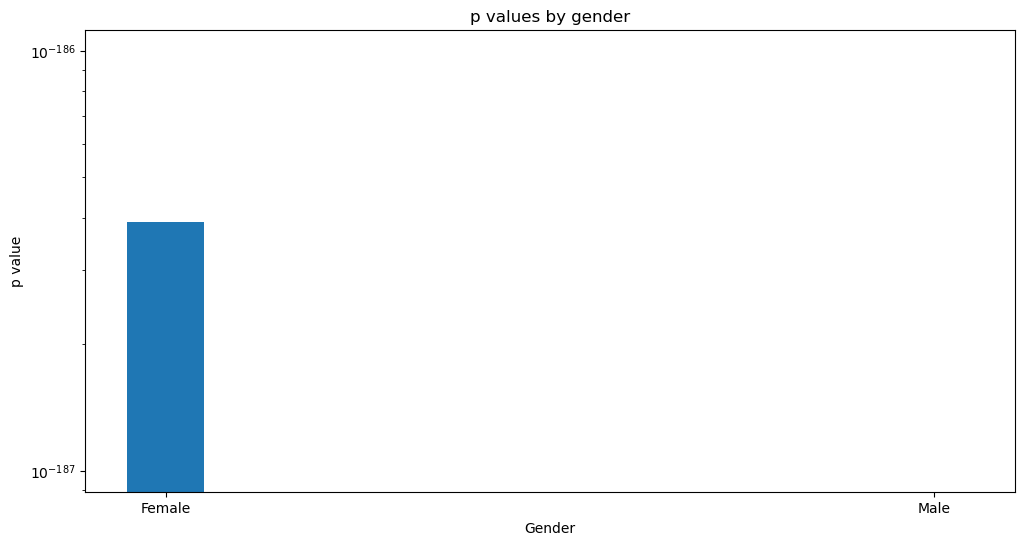

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(gender_group, gender_p_values, width=0.1)
plt.xlabel('Gender')
plt.ylabel('p value')
plt.title('p values by gender')
plt.xticks(rotation=360)
plt.yscale('log')
plt.show()

### From the above graph it is evident that it is within the p value so drink works for both the gender but it works well for male as  p value is close to zero

### In what categories could we absolutely say that BlueBull works as a height enhancer and in what other categories can we say that BlueBull doesn’t as a height enhancer and in what categories do we need to investigate further.?

### Finding P value

In [19]:
# grouping by Meat Consumer

grouped_control = blue_bells_control_data.groupby(['Is Meat Consumer?'])
grouped_test = blue_bells_test_data.groupby(['Is Meat Consumer?'])
consumers=[]
consumer_p_value=[]

for consumer, group_control, group_test in zip(grouped_control.groups.keys(), grouped_control, grouped_test):
    # Get the 'Height Increase' data for the current state
    control_data = group_control[1]['Height Increase']
    test_data = group_test[1]['Height Increase']

    # Calculate variances
    var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
    var_test = np.var(test_data, ddof=1)

    # Calculate the ratio of variances
    variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control

    # Perform the t-test based on variance comparison
    if variance_ratio < variance_threshold:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=True,alternative="greater")
    else:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=False,alternative="greater")
        
            
    if consumer==0:
        consumer='Non Meat Consumer'
    else:
        consumer='Meat Consumer'

    consumers.append(consumer)
    consumer_p_value.append(p_value)

    # Determine whether to reject or accept the null hypothesis
    if p_value < alpha:
        print(f"Reject the null hypothesis for '{consumer}'.")
        print(f"There is enough evidence to conclude that the blue bells drink helps as a height enhancer for '{consumer}'.")
    else:
        print(f"Fail to reject the null hypothesis for '{consumer}'.")
        print(f"There is not enough evidence to conclude that the blue bells drink helps as a height enhancer for '{consumer}'.")

    # Print the t-statistic and p-value
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Reject the null hypothesis for 'Non Meat Consumer'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for 'Non Meat Consumer'.
t-statistic: 35.76847682742751
p-value: 7.807531354574462e-157

Reject the null hypothesis for 'Meat Consumer'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for 'Meat Consumer'.
t-statistic: 49.05112200711324
p-value: 1.7945730028500833e-301



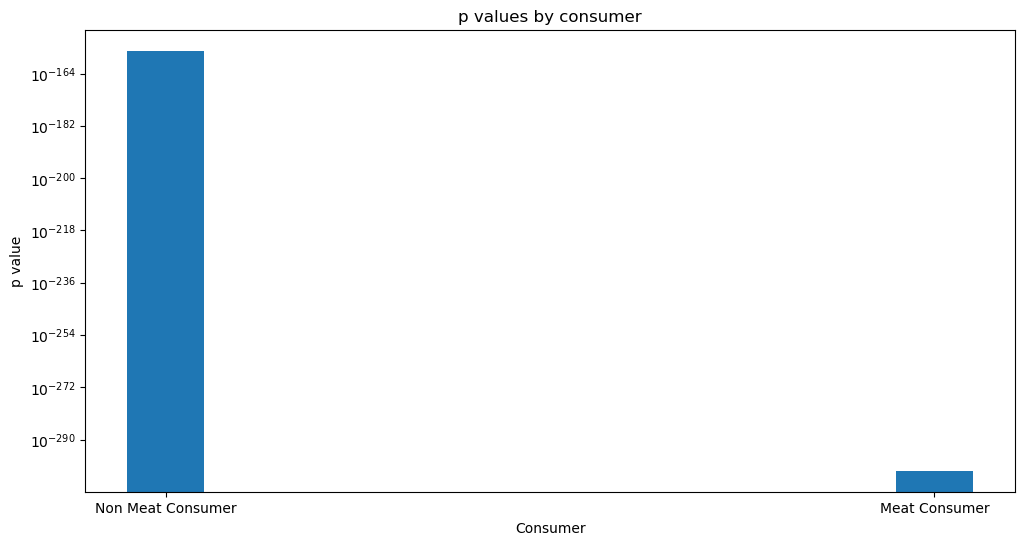

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(consumers, consumer_p_value, width=0.1)
plt.xlabel('Consumer')
plt.ylabel('p value')
plt.title('p values by consumer')
plt.xticks(rotation=360)
plt.yscale('log')
plt.show()

### From the above graph it is evident that it is within the p value so drink works for both the consumer but it works well for meat consumer as  p value is close to zero

In [21]:
# grouping by Rural Population

grouped_control = blue_bells_control_data.groupby(['Is Rural Area ?'])
grouped_test = blue_bells_test_data.groupby(['Is Rural Area ?'])
populations=[]
population_p_value=[]

for population, group_control, group_test in zip(grouped_control.groups.keys(), grouped_control, grouped_test):
    # Get the 'Height Increase' data for the current state
    control_data = group_control[1]['Height Increase']
    test_data = group_test[1]['Height Increase']

    # Calculate variances
    var_control = np.var(control_data, ddof=1)  # ddof=1 for unbiased estimate
    var_test = np.var(test_data, ddof=1)

    # Calculate the ratio of variances
    variance_ratio = var_control / var_test if var_control > var_test else var_test / var_control

    # Perform the t-test based on variance comparison
    if variance_ratio < variance_threshold:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=True,alternative="greater")
    else:
        t_statistic, p_value = stats.ttest_ind(test_data, control_data, equal_var=False,alternative="greater")
        
            
    if population==0:
        population='Rural'
    else:
        population='Urban'
        
    populations.append(population)
    population_p_value.append(p_value)
    
    # Determine whether to reject or accept the null hypothesis
    if p_value < alpha:
        print(f"Reject the null hypothesis for '{population}'.")
        print(f"There is enough evidence to conclude that the blue bells drink helps as a height enhancer for '{population}'.")
    else:
        print(f"Fail to reject the null hypothesis for '{population}'.")
        print(f"There is not enough evidence to conclude that the blue bells drink helps as a height enhancer for '{population}'.")

    # Print the t-statistic and p-value
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Reject the null hypothesis for 'Rural'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for 'Rural'.
t-statistic: 34.82778025309986
p-value: 2.882987482113659e-150

Reject the null hypothesis for 'Urban'.
There is enough evidence to conclude that the blue bells drink helps as a height enhancer for 'Urban'.
t-statistic: 49.69883832896425
p-value: 6.133160779600776e-308



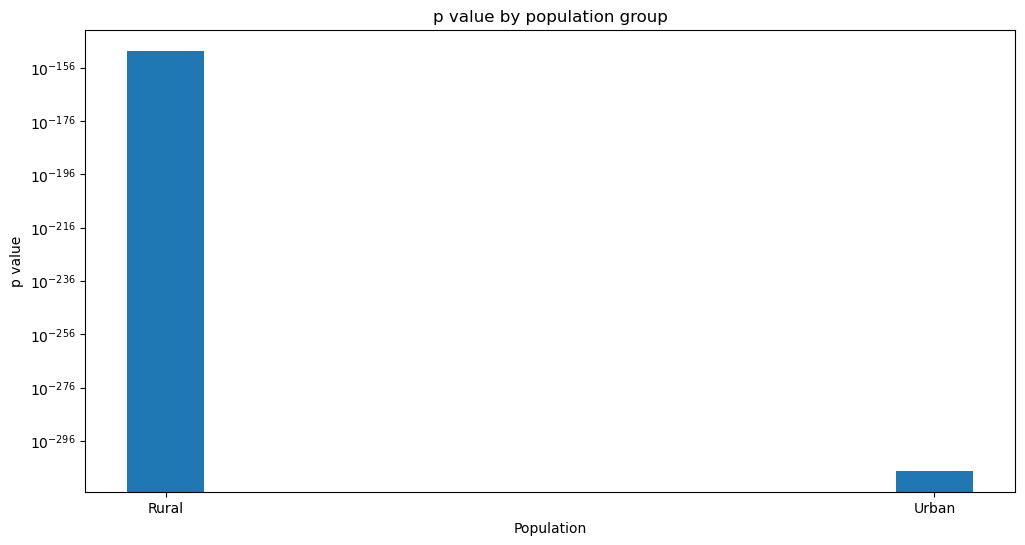

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(populations, population_p_value, width=0.1)
plt.xlabel('Population')
plt.ylabel('p value')
plt.title('p value by population group')
plt.xticks(rotation=360)
plt.yscale('log')
plt.show()

### From the above graph it is evident that it is within the p value so drink works for both the population but it works well for urban population as  p value is close to zero

### Conclusion

### Based on the results from the conducted experiment overall this product enhances the height of an individual and CEO can market this and also below are the few observation made 


#### Effectiveness in Rural vs. Urban Populations: The blue bells drink is more effective as a height enhancer for the urban population. However, it's important to note that it still enhances the height of the Rural population, but the effect is more pronounced in Urban areas. This information can be used to tailor marketing strategies and target demographics accordingly.

#### Effectiveness in Meat vs. Non-Meat Consumers: Similarly, the product is more effective for Meat consumers, but it also has a positive effect on Non-Meat consumers. Highlighting its effectiveness in both groups can broaden the product's appeal.

#### Effectiveness by Gender: The blue bells drink appears to be effective for both genders, with a stronger impact observed in males. This information can inform marketing efforts and product positioning.

#### State-Level Effectiveness: The product is effective as a height enhancer in most states where the null hypothesis was rejected. However, further data or analysis is needed for states(Chandigarh, Goa, Mizoram, Sikkim) with missing values. Marketing strategies can focus on the states where effectiveness has been demonstrated.

#### Experiment Duration: Given the highly significant and consistent results observed up to the 6th month of the experiment, it may not be necessary to continue the experiment for the full 12 months. Stopping at the 6th month can save time and resources while still providing strong evidence of the product's effectiveness. This decision should consider cost-effectiveness and the practicality of continuing the study.

#### In summary, the product appears to have a positive effect on height enhancement across various demographics, and these findings can guide marketing efforts and future research decisions.
